### Dataset Content

<b>appleStore.csv</b>
- "id" : App ID
- "track_name": App Name
- "size_bytes": Size (in Bytes)
- "currency": Currency Type
- "price": Price amount
- "rating_count_tot": User Rating counts (for all version)
- "rating_count_ver": User Rating counts (for current version)
- "user_rating" : Average User Rating value (for all version)
- "user_rating_ver": Average User Rating value (for current version)
- "ver" : Latest version code
- "cont_rating": Content Rating
- "prime_genre": Primary Genre
- "sup_devices.num": Number of supporting devices
- "ipadSc_urls.num": Number of screenshots showed for display
- "lang.num": Number of supported languages
- "vpp_lic": Vpp Device Based Licensing Enabled

<b>appleStore_description.csv</b>
- id : App ID
- track_name: Application name
- size_bytes: Memory size (in Bytes)
- app_desc: Application description

### Objective
What kind of App should I invest in?

### Method

In [84]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
from sklearn.linear_model import LinearRegression 
from scipy import stats

In [2]:
# Importing dataset
apple = pd.read_csv('app-store-apple-data-set-10k-apps/appleStore.csv')
# Dropping index
apple = apple.drop(columns='Unnamed: 0')

In [3]:
# First look
print("Dataset shape: "+ str(apple.shape))
print("Dataset columns: "+ str(apple.columns))
apple.head()

Dataset shape: (7197, 16)
Dataset columns: Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
# Confirming price is only USD
apple.currency.unique()

# Dropping column since it's only USD

array(['USD'], dtype=object)

In [5]:
# New df with only used columns
apps = apple[['size_bytes', 'price', 'rating_count_tot', 'user_rating', 'prime_genre',
                     'sup_devices.num', 'lang.num']]
apps.head()

,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices.num,lang.num
0,100788224,3.99,21292,4.0,Games,38,10
1,158578688,0.00,161065,4.0,Productivity,37,23
2,100524032,0.00,188583,3.5,Weather,37,3
3,128512000,0.00,262241,4.0,Shopping,37,9
4,92774400,0.00,985920,4.5,Reference,37,45


In [6]:
# Adding free or paid column
apps['free_vs_paid'] = apps['price'].apply(lambda x: 'paid' if x > 0 else 'free')
apps.head()

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices.num,lang.num,free_vs_paid
0,100788224,3.99,21292,4.0,Games,38,10,paid
1,158578688,0.00,161065,4.0,Productivity,37,23,free
2,100524032,0.00,188583,3.5,Weather,37,3,free
3,128512000,0.00,262241,4.0,Shopping,37,9,free
4,92774400,0.00,985920,4.5,Reference,37,45,free


In [7]:
# Changing size bites to Mb
apps.size_bytes = round(apps.size_bytes / (1024 * 1024),2)
apps.head()

/Users/marie/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices.num,lang.num,free_vs_paid
0,96.12,3.99,21292,4.0,Games,38,10,paid
1,151.23,0.00,161065,4.0,Productivity,37,23,free
2,95.87,0.00,188583,3.5,Weather,37,3,free
3,122.56,0.00,262241,4.0,Shopping,37,9,free
4,88.48,0.00,985920,4.5,Reference,37,45,free


In [8]:
apps.rename(columns = {"size_bytes": "size_mb"}, inplace=True)
apps.head()

/Users/marie/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,size_mb,price,rating_count_tot,user_rating,prime_genre,sup_devices.num,lang.num,free_vs_paid
0,96.12,3.99,21292,4.0,Games,38,10,paid
1,151.23,0.00,161065,4.0,Productivity,37,23,free
2,95.87,0.00,188583,3.5,Weather,37,3,free
3,122.56,0.00,262241,4.0,Shopping,37,9,free
4,88.48,0.00,985920,4.5,Reference,37,45,free


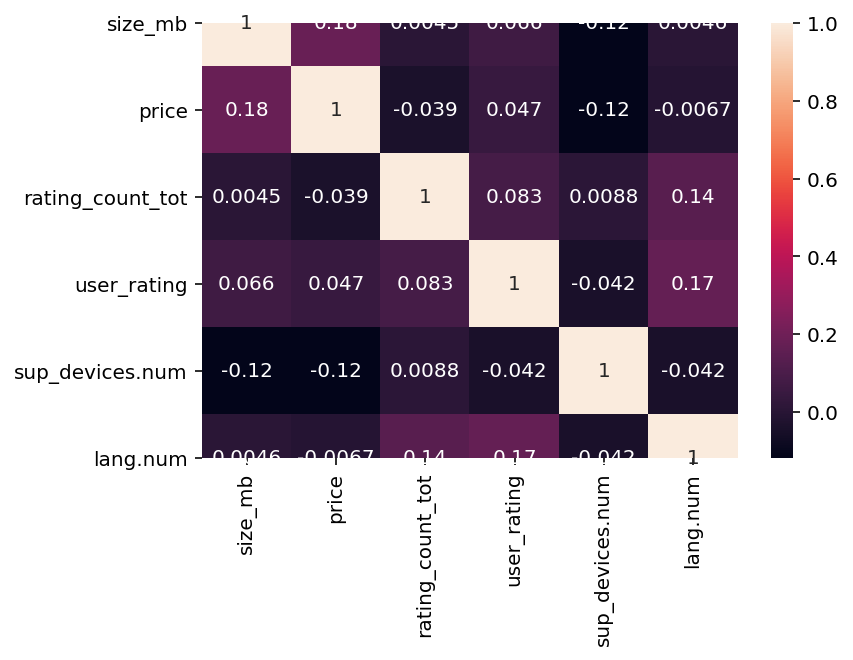

user_rating         1.000000
lang.num            0.170976
rating_count_tot    0.083310
size_mb             0.066256
price               0.046601
sup_devices.num    -0.042451
Name: user_rating, dtype: float64

In [9]:
# Is there any correlations?
apps_corr = apps.corr()
sns.heatmap(apps_corr, annot=True)
plt.show()

apps_corr.user_rating.sort_values(ascending = False)

We cannot see any correlation at first look.

#### Market Share

In [10]:
genre = apps.prime_genre.value_counts()
genre

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [11]:
print ('Percentage of Game Apps in the overall market: ' + str(round(sum(apps.prime_genre  == 'Games')/len(apps.prime_genre)*100, 
                                                                          2)) + " %")

Percentage of Game Apps in the overall market: 53.66 %


#### Paid Apps VS Free Apps

In [12]:
# Number of paid apps VS free by genre
cross_free_vs_paid = pd.crosstab(index = apps.prime_genre, columns = apps.free_vs_paid, margins = True, normalize = 'index')\
    .round(4)*100
cross_free_vs_paid

free_vs_paid,free,paid
prime_genre,,
Book,58.93,41.07
Business,35.09,64.91
Catalogs,90.00,10.00
Education,29.14,70.86
Entertainment,62.43,37.57
Finance,80.77,19.23
Food & Drink,68.25,31.75
Games,58.44,41.56
Health & Fitness,42.22,57.78


/Users/marie/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


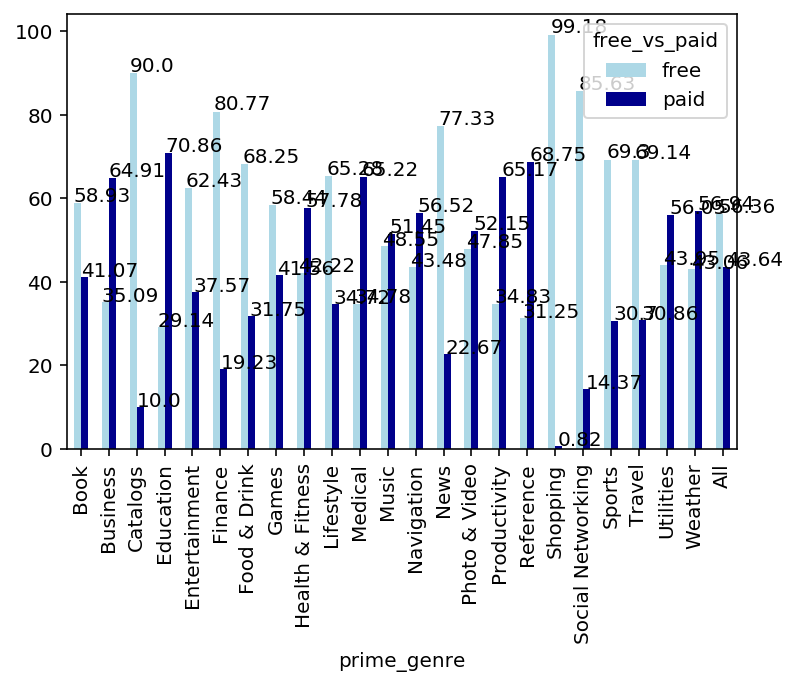

In [13]:
ax = cross_free_vs_paid.plot.bar(colors = ['lightblue', 'darkblue'])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [14]:
paid_apps = apps.loc[(apple.price > 0)]
free_apps = apps.loc[(apple.price == 0)]

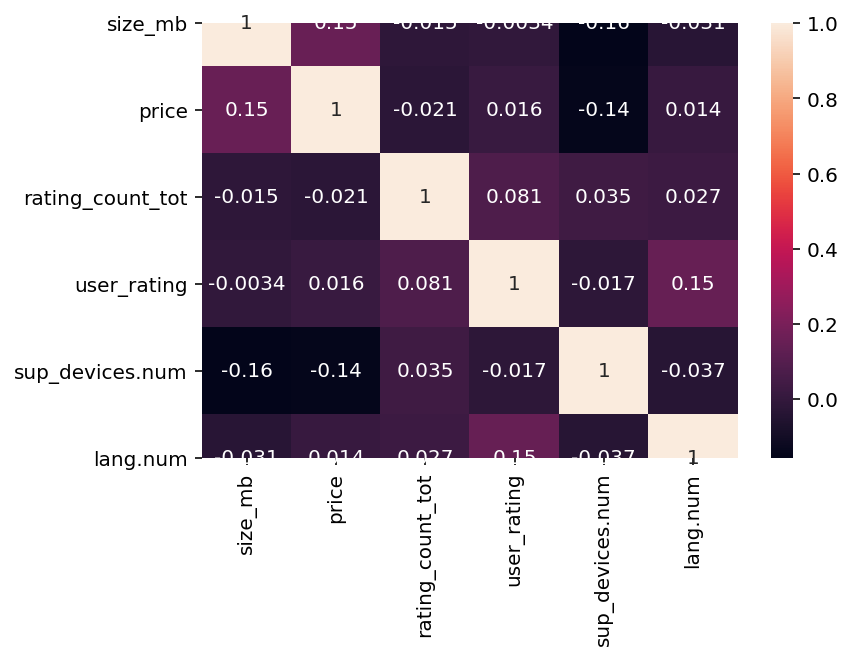

user_rating         1.000000
lang.num            0.146517
rating_count_tot    0.080555
price               0.016326
size_mb            -0.003433
sup_devices.num    -0.017016
Name: user_rating, dtype: float64

In [15]:
paid_apps_corr = paid_apps.corr()
sns.heatmap(paid_apps_corr, annot=True)
plt.show()

paid_apps_corr.user_rating.sort_values(ascending = False)

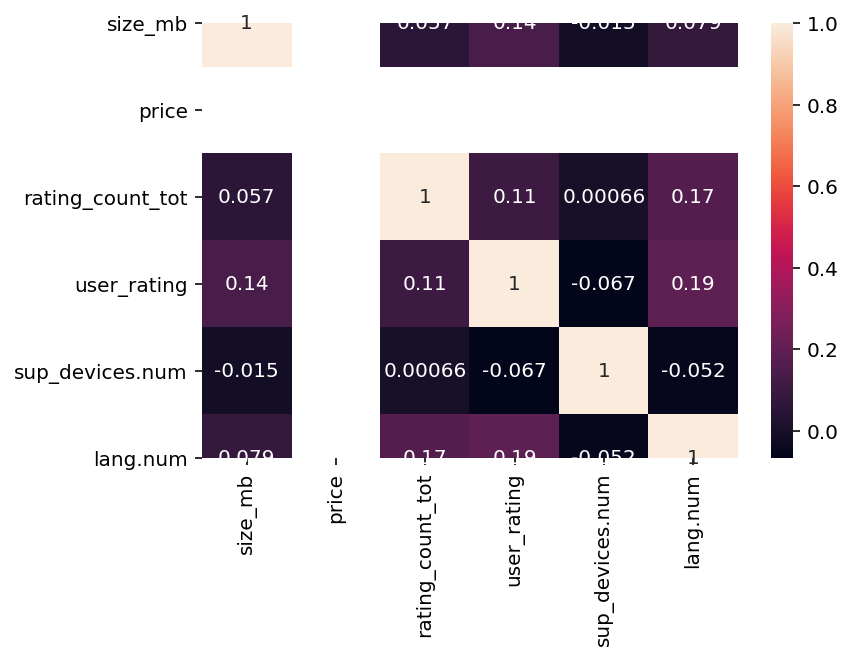

user_rating         1.000000
lang.num            0.192806
size_mb             0.140160
rating_count_tot    0.107244
sup_devices.num    -0.067061
price                    NaN
Name: user_rating, dtype: float64

In [16]:
free_apps_corr = free_apps.corr()
sns.heatmap(free_apps_corr, annot=True)
plt.show()

free_apps_corr.user_rating.sort_values(ascending = False)

#### Paid Apps

count    3141.000000
mean        3.955298
std         8.315882
min         0.990000
25%         1.990000
50%         2.990000
75%         4.990000
max       299.990000
Name: price, dtype: float64


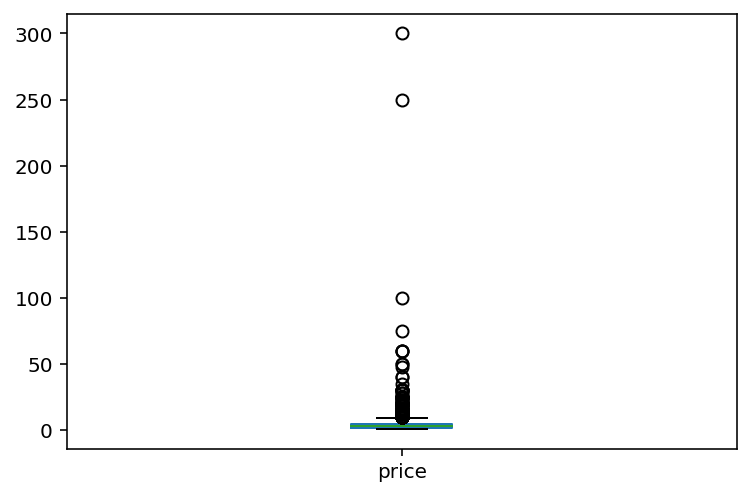

Percentage of Apps with a price higher than 59.99$: 0.06 %


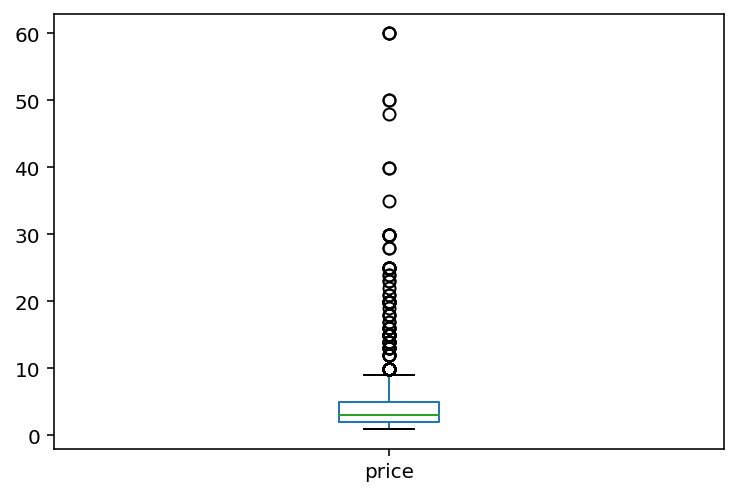

In [17]:
print(paid_apps.price.describe())

paid_apps.price.plot.box()
plt.show()

print ('Percentage of Apps with a price higher than 59.99$: ' + str(round(sum(apps.price > 59.99)/len(apps.price)*100, 
                                                                          2)) + " %")

# We can see that there is only very few apps with a price higher than 50$ that are considered outliers and can be dropped:

paid_app_no_outliers = paid_apps[paid_apps.price < 60]
paid_app_no_outliers.price.plot.box()
plt.show()

In [18]:
paid_app_no_outliers.price.describe(percentiles=[.05,.25, .5, .75, .95, .99])

count    3137.000000
mean        3.729241
std         4.170501
min         0.990000
5%          0.990000
25%         1.990000
50%         2.990000
75%         4.990000
95%         9.990000
99%        20.630000
max        59.990000
Name: price, dtype: float64

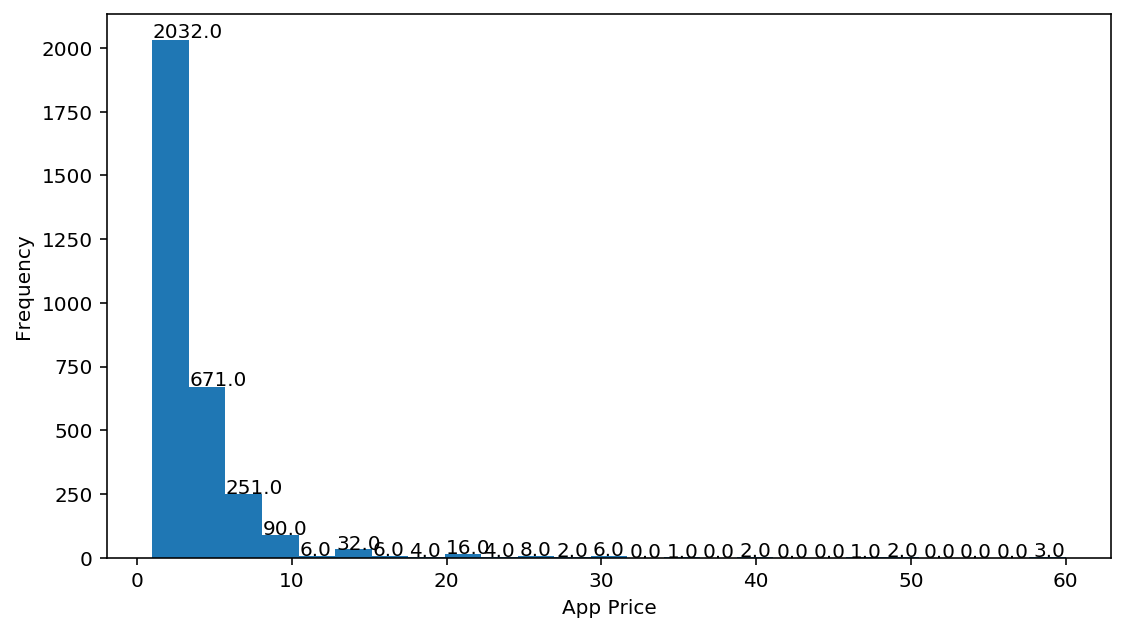

In [19]:
plt.figure(figsize=(9,5))
ax = paid_app_no_outliers.price.plot.hist(bins = 25)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('App Price')
plt.show()

In [20]:
# Estimated minimum revenue (nb of ratings * price)
def min_profit(x):
    return x['price'] * x['rating_count_tot']

paid_app_no_outliers['min_profit'] = min_profit(paid_app_no_outliers)

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
paid_app_no_outliers.head()

,size_mb,price,rating_count_tot,user_rating,prime_genre,sup_devices.num,lang.num,free_vs_paid,min_profit
0,96.12,3.99,21292,4.0,Games,38,10,paid,84955.08
5,10.00,0.99,8253,4.0,Games,47,1,paid,8170.47
8,46.97,9.99,1117,4.5,Utilities,37,1,paid,11158.83
9,66.78,3.99,7885,4.0,Games,38,10,paid,31461.15
10,47.32,4.99,76720,4.5,Games,38,11,paid,382832.80


In [46]:
min_profit = paid_app_no_outliers.pivot_table(index = 'prime_genre', values = ['min_profit', 'user_rating'], 
                                              aggfunc = {'min_profit':'mean', 
                                                         'user_rating': 'count'}).rename(columns = {'min_profit':'avg_min_profit', 'user_rating':'number_of_apps'})

min_profit.sort_values(by = 'avg_min_profit', ascending = False)

,avg_min_profit,number_of_apps
prime_genre,,
Business,19834.955405,37
Music,18219.337606,71
Games,16330.729171,1605
Productivity,15423.119652,115
Weather,12096.710976,41
News,10986.087059,17
Catalogs,10458.910000,1
Health & Fitness,8719.952404,104
Medical,8657.296000,15


#### Apps Ratings

count    7197.000000
mean        3.526956
std         1.517948
min         0.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64


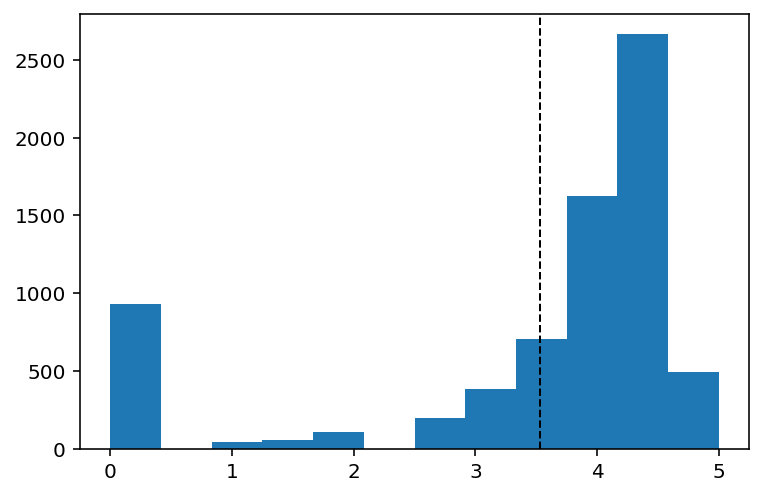

In [47]:
# All Apps
print(apps['user_rating'].describe())
plt.hist(apps['user_rating'], bins = 12)
plt.axvline(apps['user_rating'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

count    4056.000000
mean        3.376726
std         1.644807
min         0.000000
25%         3.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64


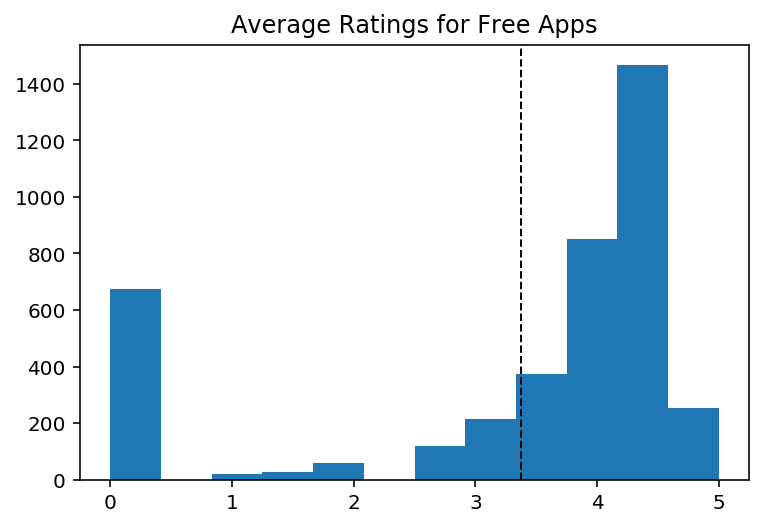

count    3137.000000
mean        3.720593
std         1.312208
min         0.000000
25%         3.500000
50%         4.000000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64


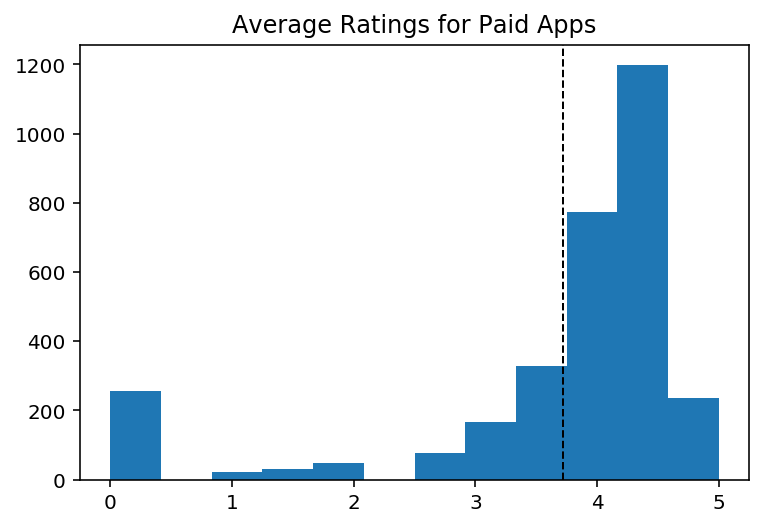

In [48]:
# Paid VS Free
print(free_apps['user_rating'].describe())
plt.hist(free_apps['user_rating'], bins = 12)
plt.axvline(free_apps['user_rating'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Average Ratings for Free Apps')
plt.show()

print(paid_app_no_outliers['user_rating'].describe())
plt.hist(paid_app_no_outliers['user_rating'], bins = 12)
plt.axvline(paid_app_no_outliers['user_rating'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Average Ratings for Paid Apps')
plt.show()

# The average ratings is higher in paid apps

In [49]:
# Mean ratings by genre
pivot_free_vs_paid = apps.pivot_table(index = 'prime_genre', values = 'user_rating', columns = 'free_vs_paid', aggfunc = 'mean')
pivot_free_vs_paid

free_vs_paid,free,paid
prime_genre,,
Book,1.598485,3.739130
Business,3.500000,3.878378
Catalogs,1.833333,4.500000
Education,3.484848,3.331776
Entertainment,3.148204,3.410448
Finance,2.220238,3.325000
Food & Drink,3.034884,3.500000
Games,3.528578,3.904984
Health & Fitness,3.578947,3.788462


In [53]:
# Apps over average:
only_good_ratings = pivot_free_vs_paid.loc[(pivot_free_vs_paid.free >=  3.376726) & (pivot_free_vs_paid.paid >=  3.720593)]
only_good_ratings

free_vs_paid,free,paid
prime_genre,,
Business,3.500000,3.878378
Games,3.528578,3.904984
Health & Fitness,3.578947,3.788462
Music,3.940299,4.014085
Photo & Video,3.793413,3.807692
Productivity,3.959677,4.030172
Shopping,3.533058,4.500000


In [58]:
# Mean rating paid apps
only_good_ratings.paid.sort_values(ascending = False)

prime_genre
Shopping            4.500000
Productivity        4.030172
Music               4.014085
Games               3.904984
Business            3.878378
Photo & Video       3.807692
Health & Fitness    3.788462
Name: paid, dtype: float64

In [55]:
# Mean rating free apps
only_good_ratings.free.sort_values(ascending = False)

prime_genre
Productivity        3.959677
Music               3.940299
Photo & Video       3.793413
Health & Fitness    3.578947
Shopping            3.533058
Games               3.528578
Business            3.500000
Name: free, dtype: float64

#### Number of Supported Devices

In [59]:
apps['sup_devices.num'].describe()

count    7197.000000
mean       37.361817
std         3.737715
min         9.000000
25%        37.000000
50%        37.000000
75%        38.000000
max        47.000000
Name: sup_devices.num, dtype: float64

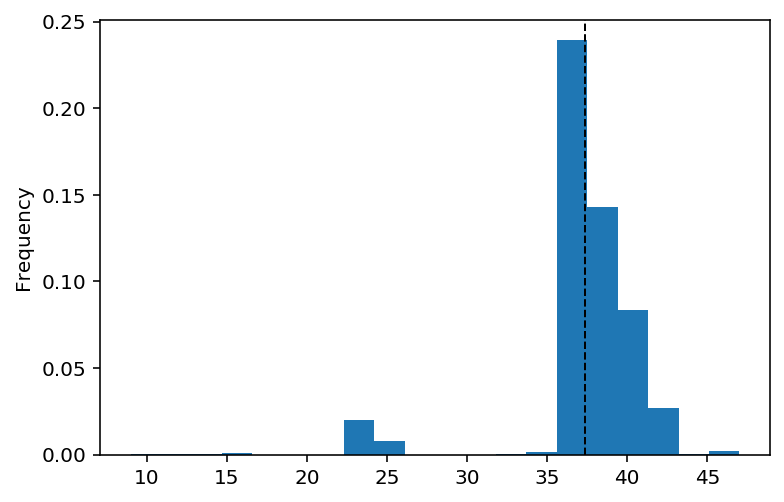

In [60]:
apps['sup_devices.num'].plot.hist(bins = 20, density=True)
plt.axvline(apps['sup_devices.num'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [68]:
apps.pivot_table(index = 'sup_devices.num', values = 'user_rating', 
                 aggfunc = 'mean').sort_values(by = 'user_rating', ascending = False)

,user_rating
sup_devices.num,
9,4.500000
12,4.500000
15,4.500000
11,4.333333
39,4.125000
33,4.000000
16,4.000000
24,3.881481
47,3.865385


In [70]:
apps['sup_devices.num'].corr(apps['user_rating'])

-0.042451464504586374

In [ ]:
# Most of the apps support between 35 and 40 devices

#### Number of Languages

In [73]:
apps['lang.num'].describe()

count    7197.000000
mean        5.434903
std         7.919593
min         0.000000
25%         1.000000
50%         1.000000
75%         8.000000
max        75.000000
Name: lang.num, dtype: float64

In [75]:
# Correct 0 supported languages to 1:
apps['lang.num'].loc[apps['lang.num'] == 0] = 1
apps['lang.num'].describe()

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    7197.00000
mean        5.44060
std         7.91604
min         1.00000
25%         1.00000
50%         1.00000
75%         8.00000
max        75.00000
Name: lang.num, dtype: float64

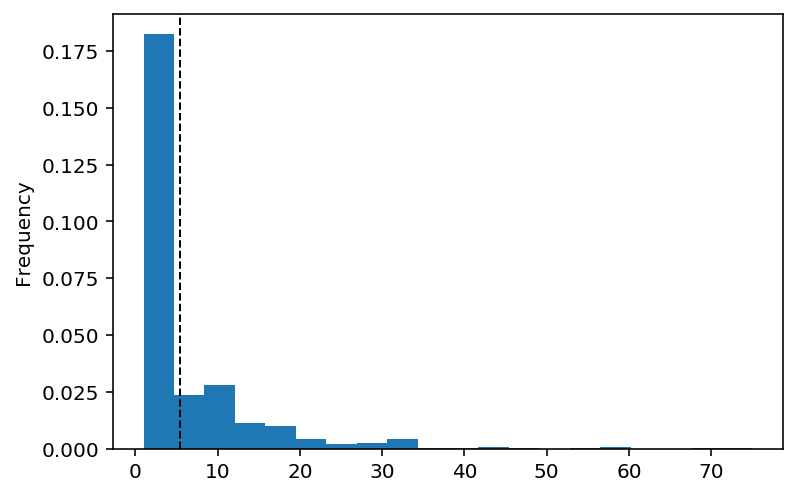

In [76]:
apps['lang.num'].plot.hist(bins = 20, density=True)
plt.axvline(apps['lang.num'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [77]:
apps.pivot_table(index = 'lang.num', values = 'user_rating', 
                 aggfunc = 'mean').sort_values(by = 'user_rating', ascending = False)

,user_rating
lang.num,
75,5.000000
35,4.500000
40,4.500000
46,4.500000
63,4.500000
47,4.500000
36,4.375000
69,4.333333
30,4.285714


In [72]:
apps['lang.num'].corr(apps['user_rating'])

0.17097627663919165

#### Size

In [78]:
apps['size_mb'].describe()

count    7197.000000
mean      189.909405
std       342.566418
min         0.560000
25%        44.750000
50%        92.650000
75%       173.500000
max      3839.460000
Name: size_mb, dtype: float64

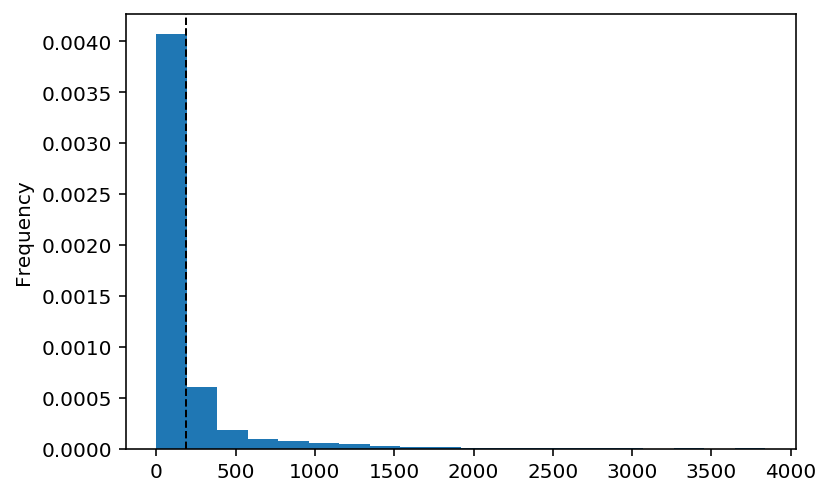

In [79]:
apps['size_mb'].plot.hist(bins = 20, density=True)
plt.axvline(apps['size_mb'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [80]:
apps['size_mb'].corr(apps['user_rating'])

0.06625565647963375

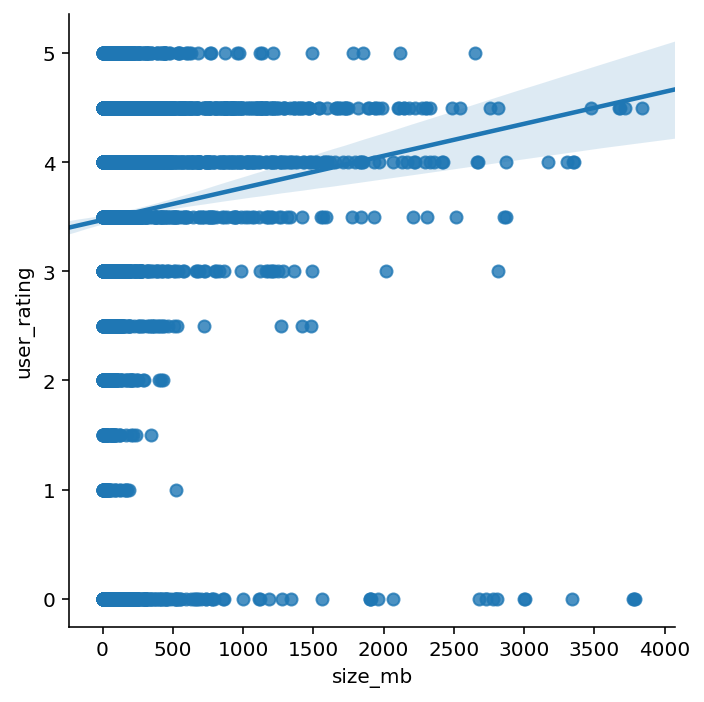

In [89]:
sns.lmplot(x = 'size_mb', y ='user_rating', data = apps) 

In [90]:
X = apps['user_rating']
Y = apps['size_mb']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('Slope: ' + str(slope))

Slope: 14.952402175284254


### Conclusions
Market Share
- The market is dominated by Games apps with 53.66 % of the market share

Price
- 58.44% of the Games	Apps are free
- Overall, 56.36% of the apps on the market are free
- The genre with the higher percentage of paid apps is Education with over 70% of paid apps
- The average price is 3.95 USD
- Most of the apps in the market cost less than 5 USD

Estimated minimum profit: calculated using the number of votes and the price
- Business is the most profitable genre with an average of 19834.95 USD with a share of only 0.79 % of the overall market
- Games is the 3rd most profitable with an average of 16330.73 USD
- Sports is the least profitable with an average of 840.37 USD

Free VS Paid
- Free apps average rating: 3.38
- Paid apps average rating: 3.72
- Genre were both the free and paid apps are rated over the average: Business, Games, Health & Fitness, Music, Photo & Video, Productivity, Shopping.
- Median for both is 4 which shows that users are more likely to leave positive comments

Supported devices
- Most of the apps support between 35 and 40 devices with an average of 37
- No correlation between supported devices and user ratings: -0.04

Supported languages
- No correlation between supported devices and user ratings: 0.17
- Median is 1 which shows that most of the apps are only available in one language

Size
- 50% of the applications size in below 92.65Mb
- No correlation between size and user ratings: 0.07 but we can see that the ratings tend to increase with the increase of the size